In [3]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder # 범주형 변수처리
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer   # SimpleImputer는 결측치를 간편하게 처리해주는 클래스.
from sklearn.preprocessing import PolynomialFeatures   # PolynomialFeatures 다항차수 변환을 해주는 클래스.
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split

# machine-learning model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# file system manangement
import os # 파일 시스템 관리

# suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Training data
app_train = pd.read_csv("application_train.csv")
print('Training data shape: ', app_train.shape) # 크기 확인
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Testing data features
app_test = pd.read_csv('application_test.csv')
print('Testing data shape: ', app_test.shape)
app_test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

## TARGET 변수(label)의 분포

In [6]:
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [7]:
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

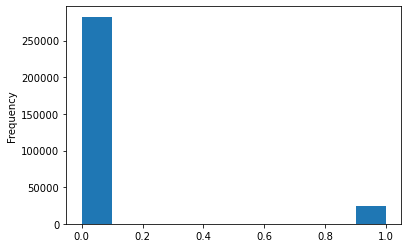

In [8]:
app_train['TARGET'].astype(int).plot.hist();

1은 대출을 제때 갚지 못한 경우이며 0은 제때 갚은 경우이다. 따라서 분포를 통해 대출을 제때 갚지 못하는 경우가 제때 갚는 경우보다 훨씬 적음을 알 수 있다.  
→ 이 분포가 모델링을 적용할 때 가중치에 영향을 줄 수 있다는 사실을 고려해야 한다.

## 명목형 변수 인코딩

In [9]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

### 라벨 인코딩

In [10]:
# 객체 생성
le = LabelEncoder()
le_count = 0

for col in app_train:
    if app_train[col].dtype == 'object': # 칼럼이 object타입이면
        
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:  # .unique method는 칼럼마다 값의 종류를 보여주는 operator.
            
            # Train on the training data
            le.fit(app_train[col])   # 라벨인코딩: 두 개 이하의 값 종류를 가진 칼럼을 1과 0의 값을 가진 변수로 변환해준다. ex) 성별
            
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])  # 라벨 인코딩으로 변환해서 원래 데이터의 칼럼을 대체해준다.
            app_test[col] = le.transform(app_test[col])   # test 데이터에도 동일하게 변환.
            
            # Keep track of how many columns were label encoded
            le_count += 1   # 라벨 인코딩된 데이터의 개수를 세주기 위해 count 1 증가.
            
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


가변수는 해당 범주에 해당하는 경우 1, 아닌 경우 0으로 값을 입력해서 범주형 자료의 값을 인식할 수 있도록 해준다.
범주형 자료를 가변수로 변환해주는 operator는 get_dummies()가 있다.

In [11]:
# 명목형 변수의 원핫 인코딩
print(app_train.shape, app_test.shape)

app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)


print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

(307511, 122) (48744, 121)
Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


결과를 보면 dummy variable을 생성하여 변수의 종류가 train data의 경우 122에서 243으로 증가했고, test data의 경우 121에서 239로 증가했다. 이는 120개 가량의 변수들 내에서 범주형 변수가 있었고 그 변수들 내의 값의 종류가 그만큼 많다는 의미다.

In [12]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
# align : 동시에 존재하는 칼럼을 출력해여 동일한 순서로 배열
# join = 'inner' : (교집합 외)동시에 존재하지 않는 칼럼은 삭제


# Add the target back in. 
app_train['TARGET'] = train_labels   # train 데이터에 추가해주는 이유는 위의 align method 때문에 삭제됐기 때문이다. 삭제된 이유는 위에 있음.

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


Training Features shape의 column이 1이 더 높은 이유는 target 변수가 있기 때문이다.

## 결측치 확인용 함수 제작 및 사용

In [13]:
def find_missing(data):
    # number of missing values
    count_missing = data.isnull().sum().values
    # total records
    total = data.shape[0]
    # percentage of missing
    ratio_missing = count_missing/total
    # return a dataframe to show: feature name, # of missing and % of missing
    return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)

In [14]:
missing_train = find_missing(app_train)
missing_test = find_missing(app_test)

missing = pd.concat([missing_train,missing_test])

## 결측치 확인용 함수 제작 및 사용

In [15]:
def see_missing(missing):
    missing_10 = missing[  (missing['missing_count']>=10)  &  (missing['missing_count']<20)]  
    missing_100 =  missing[  (missing['missing_count']>=20)  &  (missing['missing_count']<100)] 
    missing_1000 = missing[  (missing['missing_count']>=100)  &  (missing['missing_count']<1000)] 
    missing_10000 = missing[  (missing['missing_count']>=1000)  &  (missing['missing_count']<10000)] 
    missing_100000 = missing[  (missing['missing_count']>=10000)  &  (missing['missing_count']<100000)] 
    missing_1000000 = missing[  (missing['missing_count']>=100000)  ]

    print('결측치 10개 미만\n', missing_10,'\n--------------\n')
    print('결측치 100개 미만\n', missing_100,'\n--------------\n')
    print('결측치 1000개 미만\n', missing_1000,'\n--------------\n')
    print('결측치 10000개 미만\n', missing_10000,'\n--------------\n')
    print('결측치 100000개 미만\n', missing_100000,'\n--------------\n')
    print('결측치 100000개 이상\n', missing_1000000,'\n--------------\n')

In [16]:
see_missing(missing_train)

결측치 10개 미만
              missing_count  missing_ratio
AMT_ANNUITY             12       0.000039 
--------------

결측치 100개 미만
 Empty DataFrame
Columns: [missing_count, missing_ratio]
Index: [] 
--------------

결측치 1000개 미만
                  missing_count  missing_ratio
AMT_GOODS_PRICE            278       0.000904
EXT_SOURCE_2               660       0.002146 
--------------

결측치 10000개 미만
                           missing_count  missing_ratio
OBS_30_CNT_SOCIAL_CIRCLE           1021        0.00332
DEF_30_CNT_SOCIAL_CIRCLE           1021        0.00332
OBS_60_CNT_SOCIAL_CIRCLE           1021        0.00332
DEF_60_CNT_SOCIAL_CIRCLE           1021        0.00332 
--------------

결측치 100000개 미만
                             missing_count  missing_ratio
EXT_SOURCE_3                        60965       0.198253
AMT_REQ_CREDIT_BUREAU_HOUR          41519       0.135016
AMT_REQ_CREDIT_BUREAU_DAY           41519       0.135016
AMT_REQ_CREDIT_BUREAU_WEEK          41519       0.135016
AMT_REQ_CREDIT

In [17]:
see_missing(missing_test)

결측치 10개 미만
 Empty DataFrame
Columns: [missing_count, missing_ratio]
Index: [] 
--------------

결측치 100개 미만
                           missing_count  missing_ratio
AMT_ANNUITY                          24       0.000492
OBS_30_CNT_SOCIAL_CIRCLE             29       0.000595
DEF_30_CNT_SOCIAL_CIRCLE             29       0.000595
OBS_60_CNT_SOCIAL_CIRCLE             29       0.000595
DEF_60_CNT_SOCIAL_CIRCLE             29       0.000595 
--------------

결측치 1000개 미만
 Empty DataFrame
Columns: [missing_count, missing_ratio]
Index: [] 
--------------

결측치 10000개 미만
                             missing_count  missing_ratio
EXT_SOURCE_3                         8668       0.177827
AMT_REQ_CREDIT_BUREAU_HOUR           6049       0.124097
AMT_REQ_CREDIT_BUREAU_DAY            6049       0.124097
AMT_REQ_CREDIT_BUREAU_WEEK           6049       0.124097
AMT_REQ_CREDIT_BUREAU_MON            6049       0.124097
AMT_REQ_CREDIT_BUREAU_QRT            6049       0.124097
AMT_REQ_CREDIT_BUREAU_YEAR        

분석 결과, 상위 결측치 컬럼 리스트를 자세히 보면.
- AMT_REQ_CREDIT_BUREAU~로 되어있는 컬럼의 경우 모두 동일한 열의 갯수만큼 결측치가 발생하고 있음. 참고로, 이 컬럼들은 신청전 1시간/1일/1주일안에 문의 횟수를 보여주고 있음
- ~CNT_SOCIAL_CIRCLE 컬럼들 역시 동일한 특징을 보이고 있음. 참고로, 이 컬럼들은 주변 사회구성원(가족/친구/친적) 숫자를 나타내는 것으로 추정됨
- 결측치가 100000개 이상인 컬럼들은 대부분 집과 관련된 정보를 담고 있음

In [18]:
app_train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [19]:
app_test['DAYS_EMPLOYED'].describe()

count     48744.000000
mean      67485.366322
std      144348.507136
min      -17463.000000
25%       -2910.000000
50%       -1293.000000
75%        -296.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

데이터가 주로 음수이고 이상치로 365243이 있는 것을 알 수 있다.

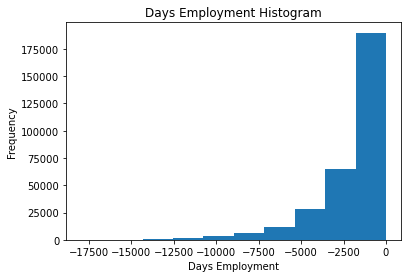

In [20]:
# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

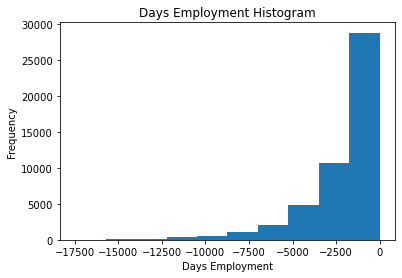

In [21]:
# Create an anomalous flag column
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_test['DAYS_EMPLOYED'].replace({365243: 0}, inplace = True)

app_test['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [22]:
# 나중에 있을 다항 변환을 위해 data를 따로 하나 복사해둔다.
app_train_ = app_train
app_test_ = app_test

In [23]:
isnull = app_train.isnull().sum().sort_values(ascending=True)
print(isnull)   # 결측치를 오름순으로 배열해서 isnull을 만들었다.
isnull = pd.DataFrame(isnull[isnull[:]>0])   #isnull을 0보다 큰 변수들만 추출
isnull.index   # 결측치가 있는 변수들을 확인한다.

SK_ID_CURR                                    0
OCCUPATION_TYPE_Private service staff         0
OCCUPATION_TYPE_Realty agents                 0
OCCUPATION_TYPE_Sales staff                   0
OCCUPATION_TYPE_Secretaries                   0
                                          ...  
NONLIVINGAPARTMENTS_MODE                 213514
NONLIVINGAPARTMENTS_AVG                  213514
COMMONAREA_MODE                          214865
COMMONAREA_AVG                           214865
COMMONAREA_MEDI                          214865
Length: 240, dtype: int64


Index(['DAYS_LAST_PHONE_CHANGE', 'CNT_FAM_MEMBERS', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG',
       'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'EXT_SOURCE_1',
       'BASEMENTAREA_MODE', 'BASEMENT

In [24]:
isnull

,0
DAYS_LAST_PHONE_CHANGE,1
CNT_FAM_MEMBERS,2
AMT_ANNUITY,12
AMT_GOODS_PRICE,278
EXT_SOURCE_2,660
...,...
NONLIVINGAPARTMENTS_MODE,213514
NONLIVINGAPARTMENTS_AVG,213514
COMMONAREA_MODE,214865
COMMONAREA_AVG,214865


61rows를 통해 결측치가 존재하는 변수의 개수가 61개인 것을 알 수있다.

In [25]:
print(app_train)
# 결측치가 있는 변수를 제거해준다. 데이터 샘플을 제거하고 싶으면 axis=0
app_train = app_train.drop(['AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG',
       'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'EXT_SOURCE_1',
       'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'OWN_CAR_AGE',
       'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI'],axis=1)

        SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           100002                   0             0                1   
1           100003                   0             0                0   
2           100004                   1             1                1   
3           100006                   0             0                1   
4           100007                   0             0                1   
...            ...                 ...           ...              ...   
307506      456251                   0             0                0   
307507      456252                   0             0                1   
307508      456253                   0             0                1   
307509      456254                   0             0                1   
307510      456255                   0             0                0   

        CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                  0          202500.0    406597.5      

In [26]:
app_train = app_train.dropna()

뭐 굳이 결측값이 있는 변수의 이름을 다 입력할 필요 없이 dropna() method를 사용하면 간단하게 처리가 된다.  
__중요한 점은 현재 변수의 개수가 너무 많아 다중공선성 문제가 발생하고 모델링 학습에 시간이 많이 걸리므로 변수를 핵심적인 eigen-vector 몇 개만 남기는 pca를 적용시키기 위해서 결측치를 다 제거해야 한다.__

In [27]:
app_train.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                              0
ORGANIZATION_TYPE_Electricity           0
ORGANIZATION_TYPE_Emergency             0
ORGANIZATION_TYPE_Government            0
ORGANIZATION_TYPE_Hotel                 0
                                       ..
NAME_INCOME_TYPE_Student                0
NAME_INCOME_TYPE_Unemployed             0
NAME_INCOME_TYPE_Working                0
NAME_EDUCATION_TYPE_Higher education    0
TARGET                                  0
Length: 182, dtype: int64

In [28]:
app_test = app_test.drop(['AMT_GOODS_PRICE', 'EXT_SOURCE_2', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'EXT_SOURCE_3', 'TOTALAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_AVG',
       'FLOORSMAX_MEDI', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI',
       'LIVINGAREA_AVG', 'ENTRANCES_MEDI', 'ENTRANCES_MODE', 'ENTRANCES_AVG',
       'APARTMENTS_AVG', 'APARTMENTS_MEDI', 'APARTMENTS_MODE', 'ELEVATORS_AVG',
       'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_AVG', 'EXT_SOURCE_1',
       'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'LANDAREA_MEDI', 'LANDAREA_MODE', 'LANDAREA_AVG', 'OWN_CAR_AGE',
       'YEARS_BUILD_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI'],axis=1)

In [29]:
app_test=app_test.dropna()

In [30]:
app_test.isnull().sum().sort_values(ascending=True)

SK_ID_CURR                              0
ORGANIZATION_TYPE_Electricity           0
ORGANIZATION_TYPE_Emergency             0
ORGANIZATION_TYPE_Government            0
ORGANIZATION_TYPE_Hotel                 0
                                       ..
NAME_INCOME_TYPE_Student                0
NAME_INCOME_TYPE_Unemployed             0
NAME_INCOME_TYPE_Working                0
NAME_EDUCATION_TYPE_Higher education    0
DAYS_EMPLOYED_ANOM                      0
Length: 182, dtype: int64

In [31]:
# Find the correlation of the positive days since birth and target
print(app_train['DAYS_EMPLOYED'], app_train['DAYS_EMPLOYED'], app_train['DAYS_LAST_PHONE_CHANGE'])
app_train['DAYS_BIRTH'] = abs(app_train_['DAYS_BIRTH'])   # DAYS_BIRTH의 값이 음수여서 양으로 바꿔줬다.
app_train['DAYS_EMPLOYED'] = abs(app_train['DAYS_EMPLOYED'])   # DAYS_EMPLOYED도 마찬가지
app_train['DAYS_LAST_PHONE_CHANGE'] = abs(app_train['DAYS_LAST_PHONE_CHANGE'])

0         -637
1        -1188
2         -225
3        -3039
4        -3038
          ... 
307506    -236
307507       0
307508   -7921
307509   -4786
307510   -1262
Name: DAYS_EMPLOYED, Length: 307496, dtype: int64 0         -637
1        -1188
2         -225
3        -3039
4        -3038
          ... 
307506    -236
307507       0
307508   -7921
307509   -4786
307510   -1262
Name: DAYS_EMPLOYED, Length: 307496, dtype: int64 0        -1134.0
1         -828.0
2         -815.0
3         -617.0
4        -1106.0
           ...  
307506    -273.0
307507       0.0
307508   -1909.0
307509    -322.0
307510    -787.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 307496, dtype: float64


In [32]:
# Find the correlation of the positive days since birth and target
print(app_test['DAYS_BIRTH'], app_test['DAYS_EMPLOYED'], app_test['DAYS_LAST_PHONE_CHANGE'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])
app_test['DAYS_EMPLOYED'] = abs(app_test['DAYS_EMPLOYED'])
app_test['DAYS_LAST_PHONE_CHANGE'] = abs(app_test['DAYS_LAST_PHONE_CHANGE'])

0       -19241
1       -18064
2       -20038
3       -13976
4       -13040
         ...  
48739   -19970
48740   -11186
48741   -15922
48742   -13968
48743   -13962
Name: DAYS_BIRTH, Length: 48720, dtype: int64 0       -2329
1       -4469
2       -4458
3       -1866
4       -2191
         ... 
48739   -5169
48740   -1149
48741   -3037
48742   -2731
48743    -633
Name: DAYS_EMPLOYED, Length: 48720, dtype: int64 0       -1740.0
1           0.0
2        -856.0
3       -1805.0
4        -821.0
          ...  
48739    -684.0
48740       0.0
48741    -838.0
48742   -2308.0
48743    -327.0
Name: DAYS_LAST_PHONE_CHANGE, Length: 48720, dtype: float64


In [33]:
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
print(app_train['DAYS_EMPLOYED_PERCENT'])

0         0.067329
1         0.070862
2         0.011814
3         0.159905
4         0.152418
            ...   
307506    0.025303
307507    0.000000
307508    0.529266
307509    0.400134
307510    0.074869
Name: DAYS_EMPLOYED_PERCENT, Length: 307496, dtype: float64


In [34]:
app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']

'CREDIT_INCOME_PERCENT'변수는 소득 대비 외상(빚)의 비율을 나타내고  
'ANNUITY_INCOME_PERCENT'변수는 소득대비 연금의 비율을 나타낸다.  
'CREDIT_TERM' 변수는 외상 대비 연금의 비율을 나타내며
'DAYS_EMPLOYED_PERCENT' 변수는 태어난 이래로 고용되어 일한 지표를 나타냈으며 이를 통해 신용도에 영향을 미치는 정도를 더 정확하게 보고자 하는 의도로 새로운 변수를 만들었다.

annuity같은 경우 일반적으로 알고 있는 pension과는 다르다고 할 수 있다. pension의 경우 은퇴를 해야 하는 사람들에게 고용주가 부담하는 퇴직 기금에서 일정액을 정해진 기간 동안 지급하는 것이다. annuity같은 경우, 투자 소득의 정기적인 장기 분할 지급을 의미하여 개인의 자발적인 투자로 일정 기간 정기적으로 원리금을 받는 것이다. 앞으로 금융 시장은 일찍 죽는 위험이 아닌 오래 사는 위험을 대비하는 흐름으로 변할 것이다. 그러므로 미국 금융 시장 또한 개인의 신용도를 노후 대비 재정설계를 통해서 측정하고자 하는 것이다.

In [35]:
app_train['FLAG_MOBIL']

0         1
1         1
2         1
3         1
4         1
         ..
307506    1
307507    1
307508    1
307509    1
307510    1
Name: FLAG_MOBIL, Length: 307496, dtype: int64

Q. 'FLAG_MOBIL'은 어떤 데이터일까?  
아마 스마트 폰 사용 유무에 대한 것을 표현하는 변수인 것으로 추측했다.

In [36]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()   # 상관행렬을 구하고 상관행렬에서 'TARGET'열을 추출했다.

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 LIVE_CITY_NOT_WORK_CITY                              0.032528
DAYS_REGISTRATION                                    0.041977
OCCUPATION_TYPE_Laborers                             0.043018
FLAG_DOCUMENT_3                                      0.044342
REG_CITY_NOT_LIVE_CITY                               0.044405
FLAG_EMP_PHONE                                       0.045989
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049814
REG_CITY_NOT_WORK_CITY                               0.051002
DAYS_ID_PUBLISH                                      0.051462
CODE_GENDER_M                                        0.054716
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058892
REGION_RATING_CLIENT_W_CITY                          0.060886
TARGET                                               1.000000
FLAG_MOBIL                                                NaN
Name: TARGET, dtype: float64

Most Negati

## 전처리한 데이터(데이터1)

In [37]:
# train data와 test data 세트1 생성
kg1_train_t = app_train['TARGET']
kg1_train_f = app_train.drop(['TARGET'], axis=1)
kg1_test_f = app_test

결측치를 처리한 train data와 test data에서 kg1_train_t, kg1_train_f, kg1_train_f를 생성. t는 target, f는 features를 의미.

In [46]:
kg1_train_f.columns.unique()

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       ...
       'WALLSMATERIAL_MODE_Others', 'WALLSMATERIAL_MODE_Panel',
       'WALLSMATERIAL_MODE_Stone, brick', 'WALLSMATERIAL_MODE_Wooden',
       'EMERGENCYSTATE_MODE_No', 'EMERGENCYSTATE_MODE_Yes',
       'CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM',
       'DAYS_EMPLOYED_PERCENT'],
      dtype='object', length=185)

## PCA 적용(데이터2)

In [50]:
pca1 = PCA(n_components=5)

# pca를 적용하기 전 feature-scailing을 적용
ss = StandardScaler()
kg1_train_f_scaled = ss.fit_transform(kg1_train_f)

#fit( )과 transform( ) 을 호출하여 train과 test 데이터의 feature 반환
data_pca_train_f = pca1.fit_transform(kg1_train_f_scaled)

print(data_pca_train_f.shape)

(307496, 5)


캐글에 제출하지 않고 train 데이터 내에서 모델 성능을 검증할 것이므로 train만 pca를 했다.

In [51]:
print(pca1.explained_variance_ratio_)

[0.03357735 0.02123625 0.0190612  0.01730199 0.0146148 ]


In [52]:
pca1.explained_variance_ratio_.sum()

0.10579158973259756

- pca로 변환한 5개의 변수가 186개 변수의 99.99%를 설명할 수 있어 5개의 변수만 선택했다.

In [53]:
pd.DataFrame(data_pca_train)

,0,1,2,3,4
0,0.772302,1.218167,-2.306983,-1.210414,-1.654414
1,0.443543,3.620134,2.744844,-0.434434,1.697814
2,0.287572,-1.815587,-3.106962,-0.845172,-1.062920
3,0.152840,-1.494973,-0.406002,-1.495385,0.138635
4,1.086756,-1.603711,-1.548001,0.971691,0.668518
...,...,...,...,...,...
307491,0.972487,2.659985,-4.154795,-0.973257,0.480097
307492,-5.411039,1.011498,-0.889997,-1.297598,-0.185321
307493,1.520308,1.331372,1.966560,-2.895390,0.345175
307494,1.669080,-0.098005,-0.449525,-1.412159,0.099190


In [56]:
kg2_train_f = data_pca_train

In [57]:
print(kg2_train_f.shape)

(307496, 5)


In [58]:
kg2_train_t = kg1_train_t

Ho2_train_t(target)을 Ho1_train_t로 하는 이유는 target 값은 0과 1밖에 나타내지 않아 결과가 동일하기 때문이다. 우리가 하고 있는 것은 pca를 통해 새로 만들어낸 변수가 target data에 어떤 영향을 미치는가를 확인하는 것. 그러므로 target의 값은 변하지 않는다.

In [59]:
print(kg2_train_t.shape)

(307496,)


Q. DAY_BIRTH 변수가 무엇을 의미하는가? 단순히 생후 지난 일수인 것 같은데 음수가 나와 이유를 모르겠다.

## 다항 변환(데이터3)
다항 변환을 했을 경우의 예: $x_1, x_2 -> 1, x_1, x_2, x_1^2, x_2^2, x_1x_2, x_1^3, x_2^3, x_1^2x_2^1, x_1x_2^2$
실제 반응 변수 y 값을 예측하기 위해 비선형 함수를 만들어 데이터의 정보를 쥐어짜내는 방식.

In [60]:
# 다항 변수를 만들어 보자
poly_features = app_train_[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test_[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

imputer = SimpleImputer(strategy = 'median')   # 결측치 중앙값으로 입력

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)   # 3차 다항식으로 변환

In [61]:
corr = app_train.corr()['TARGET'].sort_values()
print(corr)

DAYS_BIRTH                             -0.078248
NAME_EDUCATION_TYPE_Higher education   -0.056589
DAYS_LAST_PHONE_CHANGE                 -0.055221
CODE_GENDER_F                          -0.054707
NAME_INCOME_TYPE_Pensioner             -0.046217
                                          ...   
NAME_INCOME_TYPE_Working                0.057481
REGION_RATING_CLIENT                    0.058892
REGION_RATING_CLIENT_W_CITY             0.060886
TARGET                                  1.000000
FLAG_MOBIL                                   NaN
Name: TARGET, Length: 186, dtype: float64


In [62]:
# Train the polynomial features
poly_transformer.fit(poly_features)   # poly_features의 변수를 3차 다항식으로 변환하는 것이다.

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)
print('Polynomial Features test shape: ', poly_features_test.shape)

Polynomial Features shape:  (307511, 35)
Polynomial Features test shape:  (48744, 35)


In [63]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])   # 변수이름 입력

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [64]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Add in the target
poly_features['TARGET'] = poly_target   # target을 왜 추가했을까? 밑에 코드 돌릴라고

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()  

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


상관행렬을 통해 TARGET 변수와 상관계수를 확인해보니 이전보다 높은 상관성을 가진 변수들이 생성이 됐음을 알 수 있다.

In [65]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']   # .merge method를 사용하기 위해 기준이 필요해 추가해준 것.
print(poly_features.shape)   # poly_features의 행렬을 파악하기 위해서 shape method 사용.
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')   # 'SK_ID_CURR을 기준으로 app_train 왼쪽에 poly_features 병합'

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
print(poly_features_test.shape)
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
app_train_poly, app_test_poly = app_train_poly.align(app_test_poly, join = 'inner', axis = 1)   # .align method를 통해서 app_train_poly 자료 내의 target 변수 제거

# Print out the new shapes
print('Training data with polynomial features shape: ', app_train_poly.shape)
print('Testing data with polynomial features shape:  ', app_test_poly.shape)
print(app_train_poly, app_test_poly)

(307511, 37)
(48744, 36)
Training data with polynomial features shape:  (307496, 220)
Testing data with polynomial features shape:   (48720, 220)
        SK_ID_CURR  NAME_CONTRACT_TYPE  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0           100002                   0             0                1   
1           100003                   0             0                0   
2           100004                   1             1                1   
3           100006                   0             0                1   
4           100007                   0             0                1   
...            ...                 ...           ...              ...   
307491      456251                   0             0                0   
307492      456252                   0             0                1   
307493      456253                   0             0                1   
307494      456254                   0             0                1   
307495      456255                   0             

In [66]:
kg3_train_f = app_train_poly
kg3_train_t = kg1_train_t
kg3_test_f = app_test_poly

### 결측치 대체
누락된 값은 변수의 중앙값으로 대체하겠다.

In [68]:
# Median imputation of missing values
imputer1 = SimpleImputer(strategy = 'median')  # 결측치를 중앙값으로 대체하는 객체 생성.
imputer2 = SimpleImputer(strategy = 'median')
imputer3 = SimpleImputer(strategy = 'median')

# Fit on the training data
imputer1.fit(kg1_train_f)   # 결측치를 처리하지 않은 데이터를 중앙값으로 대체해준다.
imputer2.fit(kg2_train_f)
imputer3.fit(kg3_train_f)

# Transform both training and testing data
kg1_train_f = imputer1.transform(kg1_train_f)

kg2_train_f = imputer2.transform(kg2_train_f)

kg3_train_f = imputer3.transform(kg3_train_f)

kg1_train_f, kg1_test_f, kg1_train_t, kg1_test_t = train_test_split(kg1_train_f, kg1_train_t, random_state=1)
kg2_train_f, kg2_test_f, kg2_train_t, kg2_test_t = train_test_split(kg2_train_f, kg2_train_t, random_state=2)
kg3_train_f, kg3_test_f, kg3_train_t, kg3_test_t = train_test_split(kg3_train_f, kg3_train_t, random_state=3)

# 모델링

## Decision Tree
- 의사 결정 트리는 분류 기술 중에서 가장 일반적으로 사용되는 알고리즘
- 사용 이유: 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내기 위해 사용.
- 원리: Decision Tree는 한번 분기 때마다 변수 영역을 두 개로 구분하는 모델. 데이터를 구분한 뒤 각 영역의 순도(homogeneity)가 증가, 불순도(impurity) 혹은 불확실성(uncertainty)이 최대한 감소하도록 하는 방향으로 학습을 진행한다.(불순도 지표로 쓰이는 지니 계수는 당연히 낮아져야 한다.)
- 장점: 
    - 계산 비용이 적다
    - 학습된 결과를 사람이 이해하기 쉬우며 누락된 값이 있어도 처리할 수 있다.
    - 분류와 관련이 없는 속성이 있어도 처리할 수 있다.
- 단점:
    - overfitting되기 쉽다.

In [69]:
decision_tree1 = DecisionTreeClassifier(max_depth=1, random_state=1)  # 밑의 GridSearchCV를 참고해서 max_depth를 1로 설정함.
decision_tree2 = DecisionTreeClassifier(max_depth=1, random_state=2)
decision_tree3 = DecisionTreeClassifier(max_depth=1, random_state=3)

decision_tree1.fit(kg1_train_f, kg1_train_t)
decision_tree2.fit(kg2_train_f, kg2_train_t)
decision_tree3.fit(kg3_train_f, kg3_train_t)


decision_tree1_pred = decision_tree1.predict(kg1_test_f)
decision_tree2_pred = decision_tree2.predict(kg2_test_f)
decision_tree3_pred = decision_tree3.predict(kg3_test_f)

dt_accuracy1 = accuracy_score(kg1_test_t, decision_tree1_pred)
dt_accuracy2 = accuracy_score(kg2_test_t, decision_tree2_pred)
dt_accuracy3 = accuracy_score(kg3_test_t, decision_tree3_pred)

print(dt_accuracy1)
print(dt_accuracy2)
print(dt_accuracy3)

0.9187371543044462
0.9194786273642584
0.920103025730416


In [70]:
decision_tree1 = DecisionTreeClassifier(random_state=1)
decision_tree2 = DecisionTreeClassifier(random_state=2)
decision_tree3 = DecisionTreeClassifier(random_state=3)

params = {'max_depth' : [1,3,5]}

grid_cv1 = GridSearchCV(decision_tree1, param_grid=params, scoring='accuracy', cv=5)
grid_cv2 = GridSearchCV(decision_tree2, param_grid=params, scoring='accuracy', cv=5)
grid_cv3 = GridSearchCV(decision_tree3, param_grid=params, scoring='accuracy', cv=5)

grid_cv1.fit(kg1_train_f, kg1_train_t)
grid_cv2.fit(kg2_train_f, kg2_train_t)
grid_cv3.fit(kg3_train_f, kg3_train_t)


print('최적의 하이퍼 파라미터와 정확도:', grid_cv1.best_params_, grid_cv1.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv2.best_params_, grid_cv2.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv3.best_params_, grid_cv3.best_score_)

최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.9194439386322577
최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.919196780870419
최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.9189886481568831


데이터의 비선형성 패턴을 여러 개 잡아내는 것을 고려한 DT가 max값 1이 나왔다는 것은 데이터가 복잡하지 않고 선형성을 띄운다는 것을 의미. 오차항이 정규분포를 따를 확률이 높다(랜덤이다).

## Random Forest

- 정의: 여러 의사 결정 나무를 생성한 후에 다수결 또는 평균에 따라 출력 변수를 예측하는 알고리즘.  
(즉 의사 결정 나무와 bagging을 혼합한 형태라고 볼 수 있습니다.)
- 사용 이유: 일반적으로 결정 트리를 이용한 방법의 경우, 그 결과 또는 성능의 변동 폭이 크다는 결점을 가지고 있다. 특히 학습 데이터에 따라 생성되는 결정 트리의 성능이 다르기 때문에 일반화하여 사용하기 어렵다.
- 원리: 주어진 train data set에서 무작위로 중복을 허용해 데이터 n개 추출(bootstrap). → 선택한 데이터에서 중복 허용없이 d개 선택. → d개의 데이터를 통해 decision tree를 학습하고 생성. → 이를 k번 반복하고 decision tree를 k개 생성. → k개의 decision tree를 통해 예측하고 다수결이나 결과의 평균을 선택해서 최종 예측값으로 결정.
- 장점:
    - 예측의 변동성 감소
    - 과적합을 방지
    - 결측치의 비율이 높아져도 높은 정확도를 보인다.
    - 변수의 중요성을 파악 가능
- 단점:
    - 데이터의 수가 많아지면 의사 결정나무에 비해 속도가 크게 떨어짐
    - 결과에 대한 해석이 어렵다.

In [71]:
random_forest1 = RandomForestClassifier(n_estimators = 100, random_state = 1, n_jobs = -1)
random_forest2 = RandomForestClassifier(n_estimators = 100, random_state = 2, n_jobs = -1)
random_forest3 = RandomForestClassifier(n_estimators = 100, random_state = 3, n_jobs = -1)

random_forest1.fit(kg1_train_f, kg1_train_t)
random_forest2.fit(kg2_train_f, kg2_train_t)
random_forest3.fit(kg3_train_f, kg3_train_t)

random_forest1_pred = random_forest1.predict(kg1_test_f)
random_forest2_pred = random_forest2.predict(kg2_test_f)
random_forest3_pred = random_forest3.predict(kg3_test_f)

rf_accuracy1 = accuracy_score(kg1_test_t, random_forest1_pred)
rf_accuracy2 = accuracy_score(kg2_test_t, random_forest2_pred)
rf_accuracy3 = accuracy_score(kg3_test_t, random_forest3_pred)

print(rf_accuracy1)
print(rf_accuracy2)
print(rf_accuracy3)

0.9187501626037412
0.9193355360720139
0.9201550589275959


In [72]:
random_forest1 = RandomForestClassifier(n_estimators = 100, random_state = 1, n_jobs = -1)
random_forest2 = RandomForestClassifier(n_estimators = 100, random_state = 2, n_jobs = -1)
random_forest3 = RandomForestClassifier(n_estimators = 100, random_state = 3, n_jobs = -1)

params = {'max_depth' : [1,3,5]}

grid_cv1 = GridSearchCV(random_forest1, param_grid=params, scoring='accuracy', cv=5)
grid_cv2 = GridSearchCV(random_forest2, param_grid=params, scoring='accuracy', cv=5)
grid_cv3 = GridSearchCV(random_forest3, param_grid=params, scoring='accuracy', cv=5)

grid_cv1.fit(kg1_train_f, kg1_train_t)
grid_cv2.fit(kg2_train_f, kg2_train_t)
grid_cv3.fit(kg3_train_f, kg3_train_t)

print('최적의 하이퍼 파라미터와 정확도:', grid_cv1.best_params_, grid_cv1.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv2.best_params_, grid_cv2.best_score_)
print('최적의 하이퍼 파라미터와 정확도:', grid_cv3.best_params_, grid_cv3.best_score_)

최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.9194439386322577
최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.919196780870419
최적의 하이퍼 파라미터와 정확도: {'max_depth': 1} 0.9189886481568831


DT와 마찬가지의 최적 파라미터 결과가 나왔다.

## Gradient Boosting Machine
- 정의: 가중치 업데이트를 gradient descent를 이용해 학습하는 알고리즘 기반의 모델
- 사용 이유: 
- 원리: 정확도가 낮더라도 일단 모델을 만들고, 드러난 약점(예측 오류)은 두 번째 모델이 보완한다. 이 둘을 합치면 처음보다는 정확한 모델이 만들어지고, 그럼에도 여전히 남아 있는 문제는 다음 모델에서 보완하여 계속 더하는 과정을 반복하는 원리
- 장점: 
    - 랜덤포레스트보다는 예측 성능이 (조금) 뛰어나다.
- 단점:
    - 수행 시간이 오래 걸림
    - 하이퍼 파라미터 튜닝 필요
    - 멀티 CPU 코어 시스템을 사용해도 병렬 처리가 지원되지 않아 학습에 많은 시간이 필요.

In [73]:
gradient_boost1 = GradientBoostingClassifier(random_state=1)
gradient_boost2 = GradientBoostingClassifier(random_state=2)
gradient_boost3 = GradientBoostingClassifier(random_state=3)

gradient_boost1.fit(kg1_train_f, kg1_train_t)
gradient_boost2.fit(kg2_train_f, kg2_train_t)
gradient_boost3.fit(kg3_train_f, kg3_train_t)

gradient_boost1_pred = gradient_boost1.predict(kg1_test_f)
gradient_boost2_pred = gradient_boost2.predict(kg2_test_f)
gradient_boost3_pred = gradient_boost3.predict(kg3_test_f)

gb_accuracy1 = accuracy_score(kg1_test_t, gradient_boost1_pred)
gb_accuracy2 = accuracy_score(kg2_test_t, gradient_boost2_pred)
gb_accuracy3 = accuracy_score(kg3_test_t, gradient_boost3_pred)

print(gb_accuracy1)
print(gb_accuracy2)
print(gb_accuracy3)

0.9187241460051513
0.9194526107656685
0.920116034029711


### LightGBM
- 정의: 리프 중심 트리분할 방식을 사용한 GBM 기반의 모델
- 사용 목적: 기존의 boosting 알고리즘인 gbm과 xgboost는 성능 대비 학습 시간이 느리다는 단점이 존재. 또한 하이퍼 파라미터가 많아 튜닝을 위한 시간이 많이 필요한데 이를 보완해주기 위해 lightGBM 사용
- 원리: 리프 중심 트리분할(Leaf Wise) 방식을 사용. 따라서 트리의 균형을 맞추지 않고 최대 손실 값을 가지는 리프 노드를 지속적으로 분할해 예측 오류 손실을 최소화 하는 것
- 장점: 
    - 빠른 학습 속도와 높은 효율성
    - 기존 GBM보다 적은 메모리 사용
    - 더욱 복잡한 모델을 만들어 정확도를 높일 수 있다.
    - GPU 사용 가능
- 단점:
    - 적은 데이터 세트의 적용일 경우 과적합 가능성이 큼

In [74]:
evals1 = [(kg1_test_f, kg1_test_t)]
evals2 = [(kg2_test_f, kg2_test_t)]
evals3 = [(kg3_test_f, kg3_test_t)]

lgbm_wrapper1 = LGBMClassifier(random_state=1, n_estimators=400 ,n_jobs = -1)
lgbm_wrapper2 = LGBMClassifier(random_state=2, n_estimators=400 ,n_jobs = -1)
lgbm_wrapper3 = LGBMClassifier(random_state=3, n_estimators=400 ,n_jobs = -1)

lgbm_wrapper1.fit(kg1_train_f, kg1_train_t, early_stopping_rounds=100, eval_set=evals1, eval_metric='logloss', verbose=True)
lgbm_wrapper2.fit(kg2_train_f, kg2_train_t, early_stopping_rounds=100, eval_set=evals2, eval_metric='logloss', verbose=True)
lgbm_wrapper3.fit(kg3_train_f, kg3_train_t, early_stopping_rounds=100, eval_set=evals3, eval_metric='logloss', verbose=True)

lgbm_wrapper1_pred = lgbm_wrapper1.predict(kg1_test_f)
lgbm_wrapper2_pred = lgbm_wrapper2.predict(kg2_test_f)
lgbm_wrapper3_pred = lgbm_wrapper3.predict(kg3_test_f)

lgbm_accuracy1 = accuracy_score(kg1_test_t, lgbm_wrapper1_pred)
lgbm_accuracy2 = accuracy_score(kg2_test_t, lgbm_wrapper2_pred)
lgbm_accuracy3 = accuracy_score(kg3_test_t, lgbm_wrapper3_pred)

print(lgbm_accuracy1)
print(lgbm_accuracy2)
print(lgbm_accuracy3)

[1]	valid_0's binary_logloss: 0.27962
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.277847
[3]	valid_0's binary_logloss: 0.276489
[4]	valid_0's binary_logloss: 0.275144
[5]	valid_0's binary_logloss: 0.274055
[6]	valid_0's binary_logloss: 0.273138
[7]	valid_0's binary_logloss: 0.272317
[8]	valid_0's binary_logloss: 0.271532
[9]	valid_0's binary_logloss: 0.27088
[10]	valid_0's binary_logloss: 0.270207
[11]	valid_0's binary_logloss: 0.269649
[12]	valid_0's binary_logloss: 0.269139
[13]	valid_0's binary_logloss: 0.268736
[14]	valid_0's binary_logloss: 0.268251
[15]	valid_0's binary_logloss: 0.267794
[16]	valid_0's binary_logloss: 0.267436
[17]	valid_0's binary_logloss: 0.267023
[18]	valid_0's binary_logloss: 0.266747
[19]	valid_0's binary_logloss: 0.266331
[20]	valid_0's binary_logloss: 0.265602
[21]	valid_0's binary_logloss: 0.265357
[22]	valid_0's binary_logloss: 0.265119
[23]	valid_0's binary_logloss: 0.264933
[24]	valid_0's binary_logloss

[207]	valid_0's binary_logloss: 0.260255
[208]	valid_0's binary_logloss: 0.26027
[209]	valid_0's binary_logloss: 0.260301
[210]	valid_0's binary_logloss: 0.260289
[211]	valid_0's binary_logloss: 0.260284
[212]	valid_0's binary_logloss: 0.260292
[213]	valid_0's binary_logloss: 0.260323
[214]	valid_0's binary_logloss: 0.260324
[215]	valid_0's binary_logloss: 0.260338
[216]	valid_0's binary_logloss: 0.260352
[217]	valid_0's binary_logloss: 0.260355
[218]	valid_0's binary_logloss: 0.260332
[219]	valid_0's binary_logloss: 0.260323
[220]	valid_0's binary_logloss: 0.260351
[221]	valid_0's binary_logloss: 0.260352
[222]	valid_0's binary_logloss: 0.260342
[223]	valid_0's binary_logloss: 0.260336
[224]	valid_0's binary_logloss: 0.260309
[225]	valid_0's binary_logloss: 0.260295
[226]	valid_0's binary_logloss: 0.260305
[227]	valid_0's binary_logloss: 0.260302
[228]	valid_0's binary_logloss: 0.260314
[229]	valid_0's binary_logloss: 0.260314
[230]	valid_0's binary_logloss: 0.260311
[231]	valid_0's b

[138]	valid_0's binary_logloss: 0.272583
[139]	valid_0's binary_logloss: 0.272564
[140]	valid_0's binary_logloss: 0.272579
[141]	valid_0's binary_logloss: 0.27257
[142]	valid_0's binary_logloss: 0.272575
Early stopping, best iteration is:
[42]	valid_0's binary_logloss: 0.272033
[1]	valid_0's binary_logloss: 0.273048
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.269024
[3]	valid_0's binary_logloss: 0.265751
[4]	valid_0's binary_logloss: 0.263103
[5]	valid_0's binary_logloss: 0.261114
[6]	valid_0's binary_logloss: 0.259345
[7]	valid_0's binary_logloss: 0.257917
[8]	valid_0's binary_logloss: 0.256716
[9]	valid_0's binary_logloss: 0.255703
[10]	valid_0's binary_logloss: 0.254836
[11]	valid_0's binary_logloss: 0.254022
[12]	valid_0's binary_logloss: 0.253313
[13]	valid_0's binary_logloss: 0.252684
[14]	valid_0's binary_logloss: 0.252119
[15]	valid_0's binary_logloss: 0.251686
[16]	valid_0's binary_logloss: 0.251306
[17]	valid_0's binary_loglos

[197]	valid_0's binary_logloss: 0.244615
[198]	valid_0's binary_logloss: 0.244603
[199]	valid_0's binary_logloss: 0.244619
[200]	valid_0's binary_logloss: 0.244626
[201]	valid_0's binary_logloss: 0.244643
[202]	valid_0's binary_logloss: 0.244662
[203]	valid_0's binary_logloss: 0.24466
[204]	valid_0's binary_logloss: 0.244664
[205]	valid_0's binary_logloss: 0.244674
[206]	valid_0's binary_logloss: 0.244694
[207]	valid_0's binary_logloss: 0.244711
[208]	valid_0's binary_logloss: 0.244727
[209]	valid_0's binary_logloss: 0.244727
[210]	valid_0's binary_logloss: 0.24474
[211]	valid_0's binary_logloss: 0.244754
[212]	valid_0's binary_logloss: 0.244769
[213]	valid_0's binary_logloss: 0.244771
[214]	valid_0's binary_logloss: 0.244784
[215]	valid_0's binary_logloss: 0.244754
[216]	valid_0's binary_logloss: 0.24472
[217]	valid_0's binary_logloss: 0.244723
[218]	valid_0's binary_logloss: 0.244723
[219]	valid_0's binary_logloss: 0.244727
[220]	valid_0's binary_logloss: 0.24472
[221]	valid_0's bina

## Logist Regression
- 정의: 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법을 적용한 모델
- 사용 이유: 선형 회귀분석은 기본적으로 종속변수와 독립변수 모두 연속형 변수일 때 사용 가능하다. 종속변수가 0 또는 1인 이진형 변수일 때 사용할 수 있는 회귀분석 방법이기 때문이다.
- 원리: 선형 방적식의 결과를 로지스틱 함수에 대입하여 0과 1사이로 나타낸다. 
- 장점: 
    - 0 ~ 1 사이의 결과값이 나와서 확률값으로 해석할 수있다.
    - 결과를 통해 유효한 정보를 획득할 수 있다.
    - 모델의 안정성을 높일 수 있다.
- 단점: 
    - 사전에 결측치 처리 및 변수 간 교호작용의 유무 및 비선형 여부를 파악해야 한다.

In [75]:
# Scale each feature to 0-1
scaler1 = MinMaxScaler(feature_range = (0, 1))
scaler2 = MinMaxScaler(feature_range = (0, 1))
scaler3 = MinMaxScaler(feature_range = (0, 1))

# Repeat with the scaler
scaler1.fit(kg1_train_f)
kg1_train_f_scaled = scaler1.transform(kg1_train_f)
kg1_test_f_scaled = scaler1.transform(kg1_test_f)

scaler2.fit(kg2_train_f)
kg2_train_f_scaled = scaler2.transform(kg2_train_f)
kg2_test_f_scaled = scaler2.transform(kg2_test_f)

scaler3.fit(kg3_train_f)
kg3_train_f_scaled = scaler3.transform(kg3_train_f)
kg3_test_f_scaled = scaler3.transform(kg3_test_f)

print('kg1 data\'s shape: ', kg1_train_f_scaled.shape, kg1_test_f_scaled.shape)
print('kg2 data\'s shape: ', kg2_train_f_scaled.shape, kg2_test_f_scaled.shape)
print('kg3 data\'s shape: ', kg3_train_f_scaled.shape, kg3_test_f_scaled.shape)

kg1 data's shape:  (230622, 185) (76874, 185)
kg2 data's shape:  (230622, 5) (76874, 5)
kg3 data's shape:  (230622, 220) (76874, 220)


In [76]:
logistic_regression1 = LogisticRegression(random_state=1)
logistic_regression2 = LogisticRegression(random_state=2)
logistic_regression3 = LogisticRegression(random_state=3)

model1 = logistic_regression1.fit(kg1_train_f, kg1_train_t)
model2 = logistic_regression2.fit(kg2_train_f, kg2_train_t)
model3 = logistic_regression3.fit(kg3_train_f, kg3_train_t)

model1_pred = model1.predict(kg1_test_f)
model2_pred = model2.predict(kg2_test_f)
model3_pred = model3.predict(kg3_test_f)

lr_accuracy1 = accuracy_score(kg1_test_t, model1_pred)
lr_accuracy2 = accuracy_score(kg2_test_t, model2_pred)
lr_accuracy3 = accuracy_score(kg3_test_t, model3_pred)

print(lr_accuracy1)
print(lr_accuracy2)
print(lr_accuracy3)

0.9187371543044462
0.9194786273642584
0.920103025730416


### 정확도 비교

In [77]:
# kg1
print(dt_accuracy1, rf_accuracy1, gb_accuracy1, lgbm_accuracy1, lr_accuracy1)
# kg2
print(dt_accuracy2, rf_accuracy2, gb_accuracy2, lgbm_accuracy2, lr_accuracy2)
# kg3
print(dt_accuracy3, rf_accuracy3, gb_accuracy3, lgbm_accuracy3, lr_accuracy3)
kg1_list = [dt_accuracy1, rf_accuracy1, gb_accuracy1, lgbm_accuracy1, lr_accuracy1]
kg2_list = [dt_accuracy2, rf_accuracy2, gb_accuracy2, lgbm_accuracy2, lr_accuracy2]
kg3_list = [dt_accuracy3, rf_accuracy3, gb_accuracy3, lgbm_accuracy3, lr_accuracy3]

def find_optimizing_algorithm(list_name, name):
    for x in range(len(list_name)):
        if list_name[x] == max(list_name):
            if x == 0:
                print(f"{name}\'s Optimizing algorithm in the list is Decision Tree", max(list_name))
            elif x ==1:
                print(f"{name}\'s Optimizing algorithm in the list is Random Forest", max(list_name))
            elif x ==2:
                print(f"{name}\'s Optimizing algorithm in the list is Gradient Boost", max(list_name))
            elif x ==3:
                print(f"{name}\'s Optimizing algorithm in the list is LightGBM", max(list_name))
            else:
                print(f"{name}\'s Optimizing algorithm in the list is Logistic Regression", max(list_name))
                
find_optimizing_algorithm(kg1_list, "kg1_list")
find_optimizing_algorithm(kg2_list, "kg2_list")
find_optimizing_algorithm(kg3_list, "kg3_list")

0.9187371543044462 0.9187501626037412 0.9187241460051513 0.9187631709030362 0.9187371543044462
0.9194786273642584 0.9193355360720139 0.9194526107656685 0.9194786273642584 0.9194786273642584
0.920103025730416 0.9201550589275959 0.920116034029711 0.9206103494029191 0.920103025730416
kg1_list's Optimizing algorithm in the list is LightGBM 0.9187631709030362
kg2_list's Optimizing algorithm in the list is Decision Tree 0.9194786273642584
kg2_list's Optimizing algorithm in the list is LightGBM 0.9194786273642584
kg2_list's Optimizing algorithm in the list is Logistic Regression 0.9194786273642584
kg3_list's Optimizing algorithm in the list is LightGBM 0.9206103494029191


단순 점수로만 확인했을 때 lightgbm이 원본 데이터와 다항변환을 시킨 데이터에서 높은 예측 성능(accuracy기준)을 보이고 있다. kg2의 경우 에측값이 0.914로 LIghtGBM과 Decision tree, Logistic Regression에서 동일하게 나왔다. LightGBM은 Decision Tree기반의 부스팅 모델이고 max_depth가 1인 것을 통해 설명변수와 반응변수간의 관계가 선형인 것을 알 수 있었다(데이터가 random이고 정규분포를 따른다). 따라서 logisticregression에서도 같은 결과값이 나온 것으로 생각한다. 또한 kg1과 kg3 data를 학습해 예측한 lightGBM과 logistic regression의 성능 차이가 그리 크지 않은데 이런 상황에서는 outlier에 over-fitting이 되기 쉬운 lightGBM보다(현재 data set에서 예측 성능이 높게 나왔다 할지라도 다른 data set을 만나면 그만큼의 예측 성능을 보이는 경우는 드물다.) 학습하고 예측하는 속도가 빠르며 이상치에 상대적으로 강한 logistic regression을 사용하는 것이 적절한 것 같다.
주의할 사항은 train data라는 같은 data set에 train, test 데이터 모두 있어 성능이 전반적으로 높게 나왔으므로 절대적인 수치에는 의미를 두지 말고 모델 간의 상대적인 비교를 할 필요가 있었다.